In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
A=1e1

def loadData(filepath):
    return pd.read_csv(filepath)

def saveData(filepath):
    return None
 
def sphere(U,V,O):
    x=np.sqrt(U)*np.cos(V)
    y=np.sqrt(U)*np.sin(V)*np.sin(O)
    z=np.sqrt(U)*np.sin(V)*np.cos(O)
    
    return x.ravel(),y.ravel(),z.ravel()
    
def spherical(U,V,O):
    x=A*np.cosh(U)*np.cos(V),
    y=A*np.sinh(U)*np.sin(V)*np.sin(O),
    z=A*np.sinh(U)*np.sin(V)*np.cos(O)
    
    return x,y,z

def jacobianSpherical(U,V,O):
    M = np.array(
            [
            A*np.sinh(U)*np.cos(V),
            -A*np.cosh(U)*np.sin(V),
            0,

            A*np.cosh(U)*np.sin(V)*np.sin(O),
            A*np.sinh(U)*np.cos(V)*np.sin(O),
            A*np.sinh(U)*np.sin(V)*np.cos(O),


            A*np.cosh(U)*np.sin(V)*np.cos(O),
            A*np.sinh(U)*np.cos(V)*np.cos(O),
            -A*np.sinh(U)*np.sin(V)*np.sin(O)
            ]
            ).reshape(3,3)

    return M

def matrixSpherical(x,y,z,U,V,O):
    M = np.array(
    [
    x-A*np.cosh(U)*np.cos(V),
    y-A*np.sinh(U)*np.sin(V)*np.sin(O),
    z-A*np.sinh(U)*np.sin(V)*np.cos(O)
    ]
    ).reshape(3,1)

    return M

def gaussNewtonSpherical(x,y,z): 
    beta = np.array([0,0,1]).reshape(3,1)
    df = beta
    i=0
    
    while(True):
        J = jacobianSpherical(beta[0][0],beta[1][0],beta[2][0])
        M = matrixSpherical(x,y,z,beta[0],beta[1],beta[2])
        print(np.matmul(np.transpose(J),M),'\n')
        df = np.linalg.solve(np.matmul(np.transpose(J),J),np.matmul(np.transpose(J),M))
        beta=beta+df
        if(np.linalg.norm(df,ord=np.inf) < 1e-12 or i>200):
            break
        else:
            i=i+1
            
    return beta

def scatter(X,boolean=False):
    fig=plt.figure()
    ax = fig.add_subplot(projection='3d')
    if boolean!=True:
        ax.set_xlabel("X")    
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.scatter(X[0],X[1],X[2])
    else:
        ax.set_xlabel("$\lambda$")    
        ax.set_ylabel("$\Theta$")
        ax.set_zlabel("$\phi$")
        ax.set_title('Constante A ='+str(A))
        ax.scatter(X[:,0],X[:,1],X[:,2])

def solve(data):
    beta = []
    for i in range(len(data)):
        beta.append(gaussNewtonSpherical(data.X.iloc[i],data.Y.iloc[i],data.Z.iloc[i]))
    return np.array(beta);

def solveVec(data):
    beta = []
    for i in range(len(data)):
        beta.append(gaussNewtonSpherical(data.BaryCenterX.iloc[i],data.BaryCenterY.iloc[i],data.BaryCenterZ.iloc[i]))
    return np.array(beta);

In [40]:
%%capture
U = 1
V = np.linspace(0,np.pi,100)
O = np.linspace(0,2*np.pi)
V,O = np.meshgrid(V,O)
x,y,z = sphere(U,V,O)

beta = []
for i in range(len(x)):
    beta.append(gaussNewtonSpherical(x[i],y[i],z[i]));
beta = np.array(beta);

LinAlgError: Singular matrix

<IPython.core.display.Javascript object>


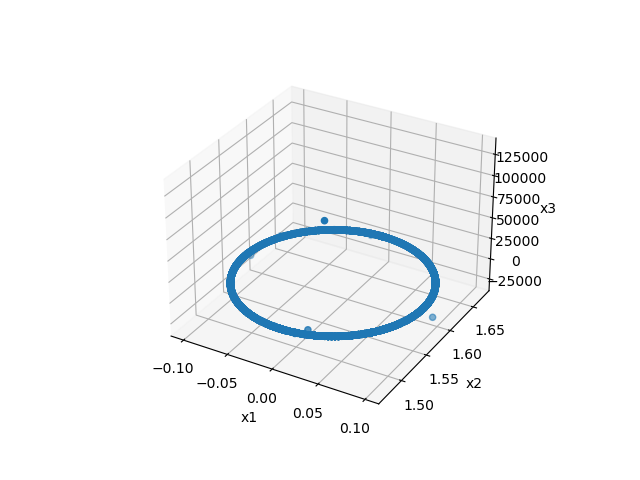

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.scatter(beta[:,0],beta[:,1],beta[:,2])